В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

## Задание
1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
4. Проанализируйте CTR с разбивкой по рекламной кампании.
5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
7. Посчитайте конверсию из клика в покупку.

## Описание данных
* ad_id – идентификатор объявления (рекламы)
* xyz_campaign_id – идентификатор рекламной кампании в базе компании X
* fb_campaign_id – идентификатор кампании в Facebook
* age – возрастная группа, которой показывалась реклама
* gender – пол тех, кому показывалась реклама
* interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
* impressions – число показов
* clicks – число кликов
* spent – сумма, которую компания потратила на показ объявления 
* total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
* approved_conversion – количество людей, которые купили продукт после просмотра рекламы


## 1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

**Сколько уникальных рекламных кампаний было проведено?**

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

plt.style.use('Solarize_Light2')

%matplotlib inline

In [3]:
conversion = pd.read_csv('/Users/vadimsmirnov/Desktop/statistics/2/conversion.csv')
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
conversion.xyz_campaign_id.value_counts()

xyz_campaign_id
1178    625
936     464
916      54
Name: count, dtype: int64

Ответ: `3`

## Задание 2

**Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.**



In [5]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


clicks - **Дискретная**			
gender - **Номинативная**			
total_conversion				
spent - **Непрерывная**				
interest - **Номинативная**			
age - **Ранговая/порядковая**			
approved_conversion	- **Дискретная**			
impressions - **Дискретная**	

## Задание 3

**Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:**

Hint: np.log()

In [6]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [12]:
conversion.fb_campaign_id.value_counts()

fb_campaign_id
144536    6
144562    6
144599    6
144636    6
144611    6
         ..
115866    1
115870    1
115876    1
115878    1
179982    1
Name: count, Length: 691, dtype: int64

In [13]:
log_fb = conversion.groupby('fb_campaign_id', as_index=False).sum()
log_fb = np.log(conversion.Impressions)
log_fb.head()

0    8.902456
1    9.790375
2    6.541030
3    8.356790
4    8.326759
Name: Impressions, dtype: float64

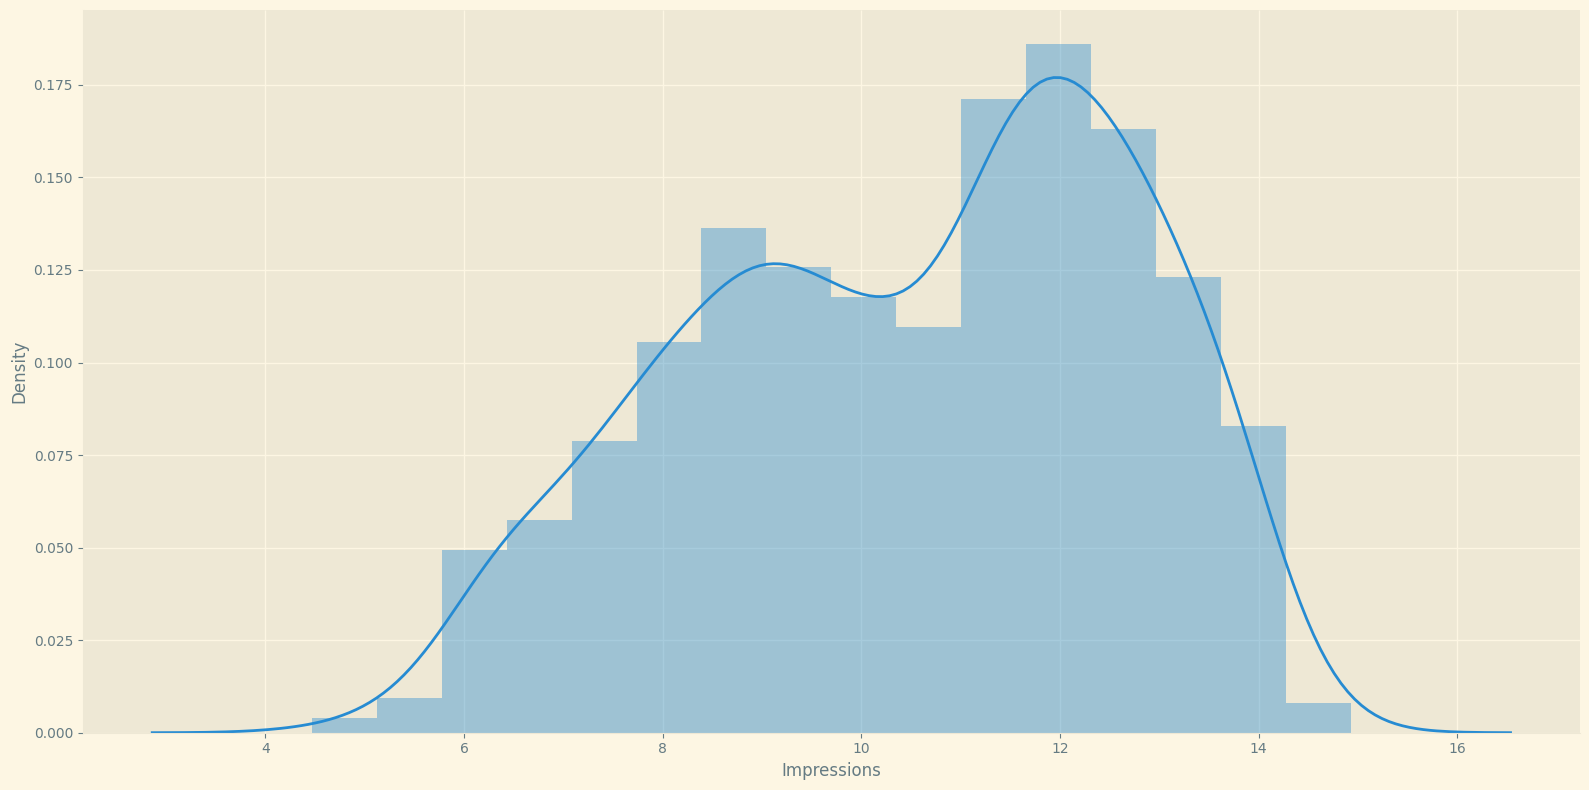

In [14]:
plt.figure(figsize=(16,8))
sns.distplot(log_fb)
plt.tight_layout()
sns.despine()

* Распределение унимодальное
* **Распределение бимодальное**
* **Полученное распределение не является нормальным**
* Распределение симметричное
* Полученное распределение является нормальным

## Задание 4

**Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.**

CTR= clicks / impressions

**Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.**

In [16]:
ctr = conversion.groupby('ad_id', as_index=False).agg({'Impressions' : 'sum', 'Clicks' : 'sum'})
ctr

,ad_id,Impressions,Clicks
0,708746,7350,1
1,708749,17861,2
2,708771,693,0
3,708815,4259,1
4,708818,4133,1
...,...,...,...
1138,1314410,1129773,252
1139,1314411,637549,120
1140,1314412,151531,28
1141,1314414,790253,135


In [20]:
ctr['CTR'] = ctr.Clicks / ctr.Impressions

In [21]:
ctr.CTR.idxmax()

150

In [22]:
ctr.iloc[150]

ad_id          738637.000000
Impressions       944.000000
Clicks              1.000000
CTR                 0.001059
Name: 150, dtype: float64

Ответ: `738637`


## Задание 5

**Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?**

![](https://storage.yandexcloud.net/klms-public/production/learning-content/11/79/614/1768/8104/dfdfd.png)

In [23]:
conversion['CTR'] = ctr.Clicks / ctr.Impressions

In [32]:
conversion.xyz_campaign_id.value_counts()

xyz_campaign_id
1178    625
936     464
916      54
Name: count, dtype: int64

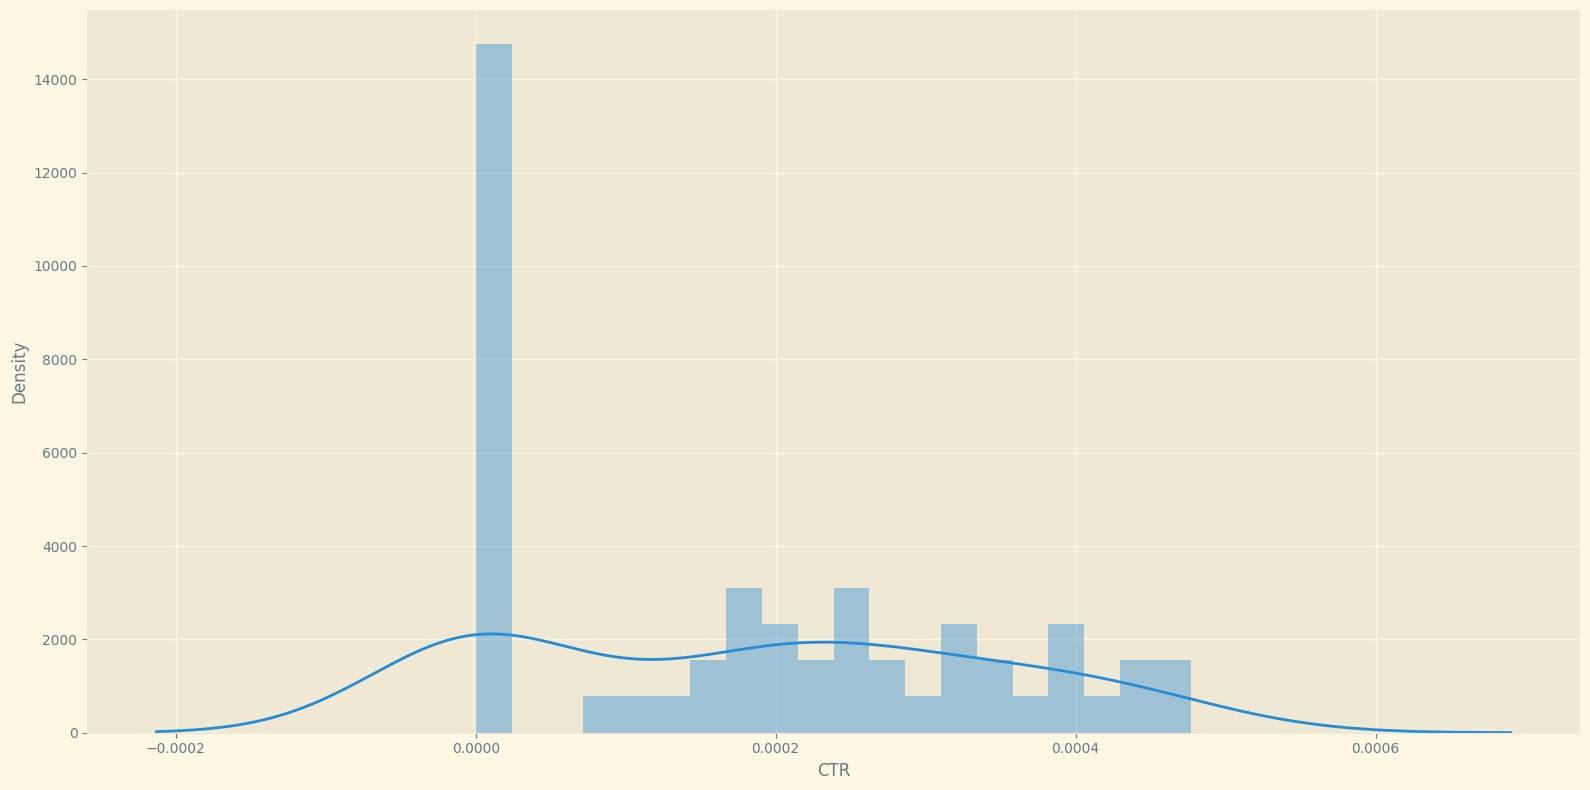

In [34]:
plt.figure(figsize=(16,8))
sns.distplot(conversion.query('xyz_campaign_id == 916').CTR, bins=20)
plt.tight_layout()
sns.despine()

* **С**
* А
* В


## Задание 6

**CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:**

CPC= spent / clicks

**Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.**

**Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().**

In [36]:
cpc = conversion.groupby('ad_id', as_index=False).agg({'Clicks' : 'sum', 'Spent' : 'sum'})
cpc.head()

,ad_id,Clicks,Spent
0,708746,1,1.43
1,708749,2,1.82
2,708771,0,0.00
3,708815,1,1.25
4,708818,1,1.29


In [37]:
conversion['CPC'] = cpc.Spent / cpc.Clicks
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [38]:
conversion.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

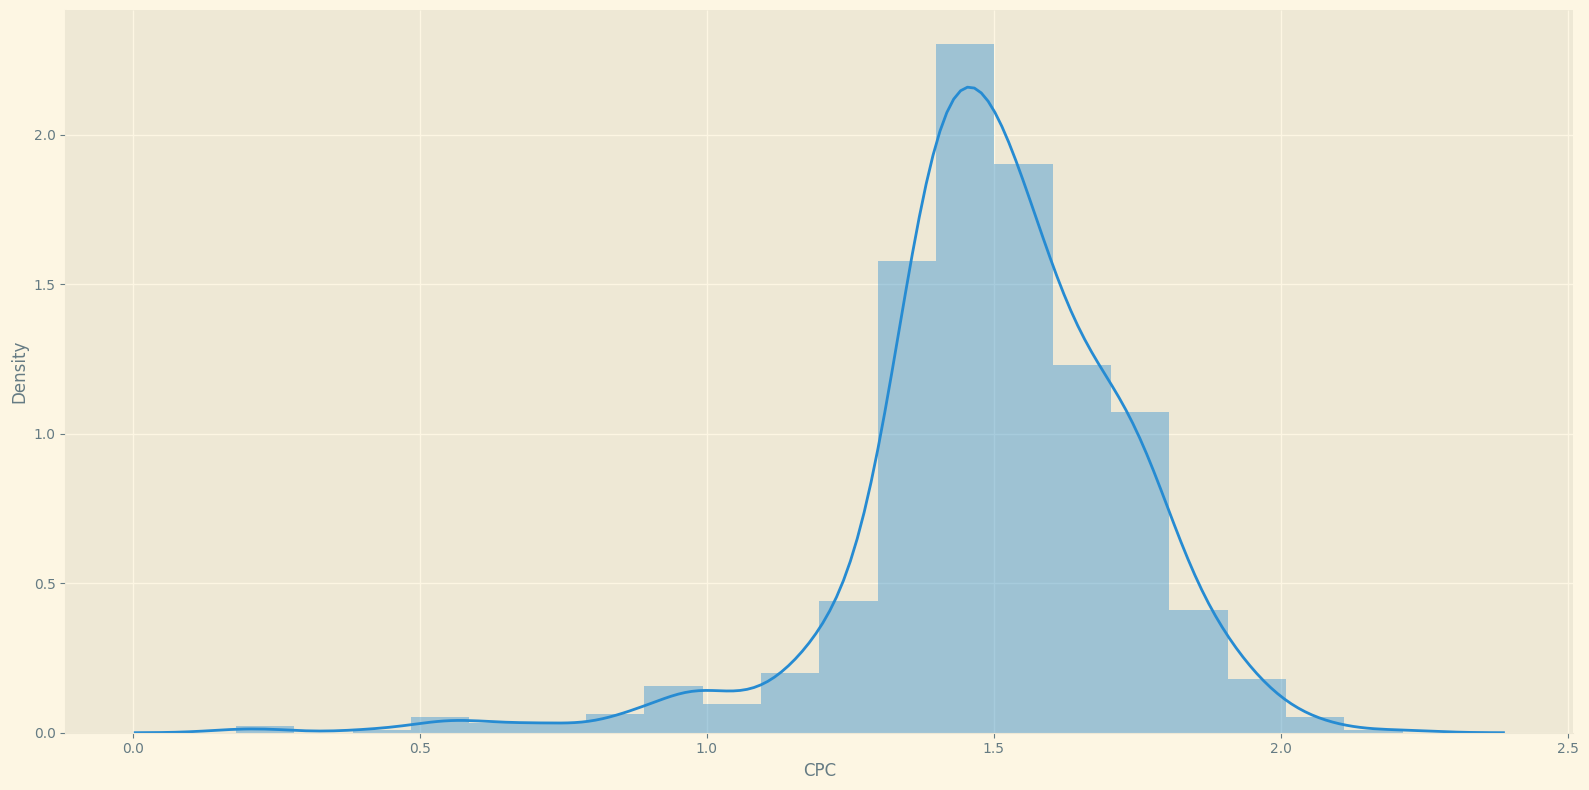

In [39]:
plt.figure(figsize=(16,8))
sns.distplot(conversion.CPC.dropna(), bins=20)
plt.tight_layout()
sns.despine()

In [40]:
np.round(ss.iqr(conversion.CPC, nan_policy='omit'), 2)

0.25

Ответ: `0.25`


## Задание 7

**Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?**

![](https://storage.yandexcloud.net/klms-public/production/learning-content/11/79/614/1768/8106/fdgshed.png)

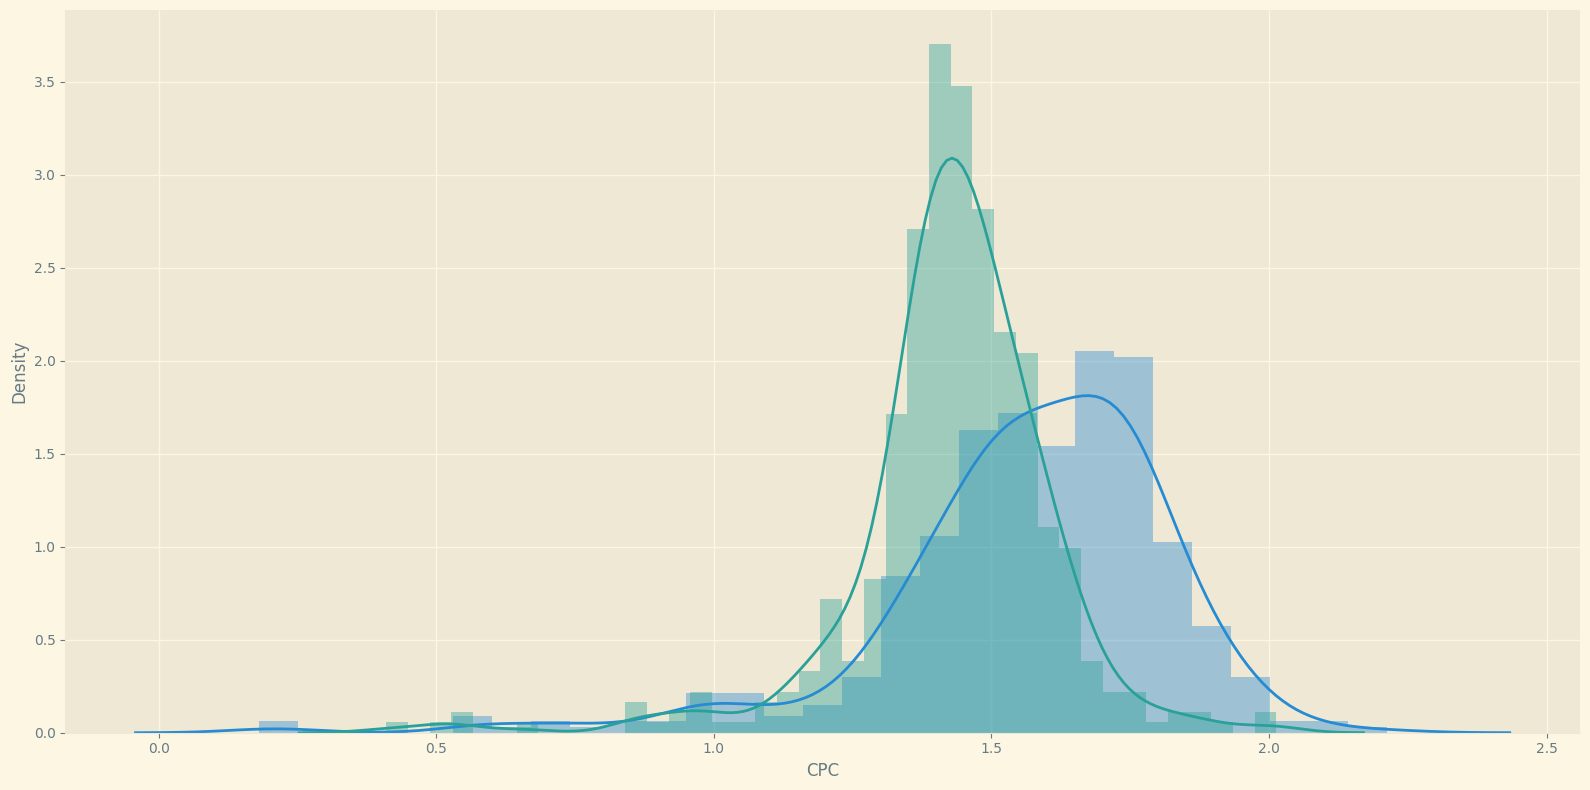

In [41]:
plt.figure(figsize=(16,8))
sns.distplot(conversion.query("gender == 'M'").dropna().CPC)
sns.distplot(conversion.query("gender == 'F'").dropna().CPC)
plt.tight_layout()
sns.despine()

* D
* A
* **B**
* C


## Задание 8

**Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.**

**Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.**

Note: клики – Clicks, покупки – Approved_Conversion.

In [42]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [43]:
cr = conversion.groupby('ad_id', as_index=False).agg({'Clicks' : 'sum', 'Approved_Conversion' : 'sum'})
cr.head()

,ad_id,Clicks,Approved_Conversion
0,708746,1,1
1,708749,2,0
2,708771,0,0
3,708815,1,0
4,708818,1,1


In [44]:
conversion['CR'] = cr.Approved_Conversion / cr.Clicks * 100
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,100.0


In [45]:
np.round(conversion.query("ad_id == 1121814").CR, 2)

860    3.09
Name: CR, dtype: float64

Ответ: `3.09`